# Fuzzy Logic and Soft Computing (LTAT.02.005)
# ASSIGNMENT 2
Student: ChengHan Chung

----------

1. Consider two triangular fuzzy sets. Apply all the known t-conorms and plot the results to show the difference among the different t-conorms (2 points). Repeat considering two trapezoidal fuzzy sets (2 points).
(hint: you can modify the t_norm Scilab function

In [45]:
import fuzzylogic
from fuzzylogic.classes import Domain
from fuzzylogic.functions import triangular,trapezoid, R, S
from fuzzylogic.hedges import minus
from matplotlib import pyplot as plt
import numpy as np

**(A) :** According to Lecture 5, there is 4 different types of t-conorms: \
- Max-operator: $max \{x, y \} = x \vee y$
- Algebraic sum: $x + y − xy$
- Bounded sum: $min\{1, x + y\}$
- Drastic sum: 
  $\begin{cases}
    x,& if & y=0 \\
    y,& if & x=0 \\
    1,& otherwise
    \end{cases}$ 

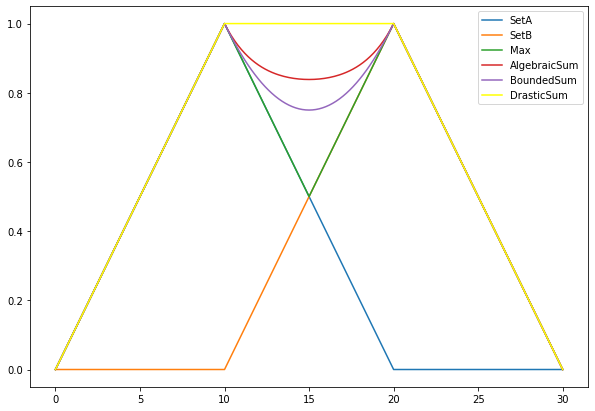

In [46]:
numbers = Domain("numbers", 0, 30, res=0.1)
numbers.triangle1 = triangular(0, 20)
numbers.triangle2 = triangular(10, 30)

# Max-operator
numbers.conorm1 = fuzzylogic.combinators.MAX(
    numbers.triangle1, numbers.triangle2)
# Algebraic sum
numbers.product = minus(fuzzylogic.combinators.multiply(
    numbers.triangle1, numbers.triangle2))
numbers.algebraicSum = numbers.triangle1 + numbers.triangle2 + numbers.product
# Bounded sum
numbers.boundedSum = numbers.triangle1+numbers.triangle2

triangle1_arr = numbers.triangle1.array()
triangle2_arr = numbers.triangle2.array()

# Drastic sum
drastic_sum = []
for x, y in zip(triangle1_arr, triangle2_arr):
    if x == 0:
        drastic_sum.append(y)
    elif y == 0:
        drastic_sum.append(x)
    else:
        drastic_sum.append(1)
drastic_sum = np.array(drastic_sum)

numbers.triangle1.plot()
numbers.triangle2.plot()
numbers.conorm1.plot()
numbers.algebraicSum.plot()
numbers.boundedSum.plot()
plt.plot(numbers.range, drastic_sum, c="yellow")


# plot everyhting

plt.legend(['SetA', 'SetB', 'Max', 'AlgebraicSum',
           'BoundedSum', 'DrasticSum'], loc="upper right")
plt.rcParams["figure.figsize"] = (10, 7)
plt.show()


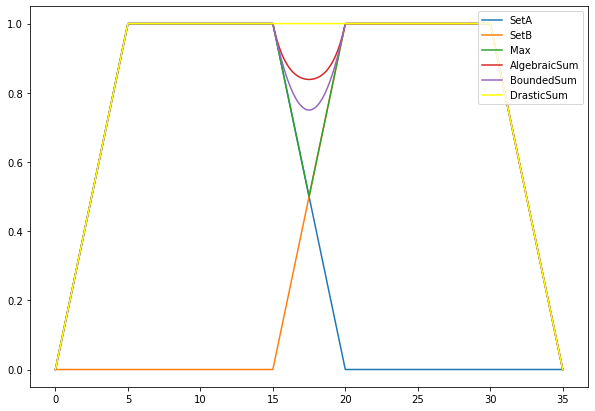

In [47]:
numbers = Domain("numbers", 0, 35, res=0.1)
numbers.trapezoid1 = trapezoid(0, 5, 15, 20)
numbers.trapezoid2 = trapezoid(15, 20, 30, 35)

# max-operator
numbers.conorm1 = fuzzylogic.combinators.MAX(numbers.trapezoid1,numbers.trapezoid2)
# algebraic sum
numbers.product = minus(fuzzylogic.combinators.multiply(numbers.trapezoid1,numbers.trapezoid2))
numbers.algebraicSum = numbers.trapezoid1 + numbers.trapezoid2 + numbers.product
# bounded sum
numbers.boundedSum = numbers.trapezoid1+numbers.trapezoid2

trapezoid1_arr = numbers.trapezoid1.array()
trapezoid2_arr = numbers.trapezoid2.array()

drastic_sum = []
for x,y in zip(trapezoid1_arr, trapezoid2_arr):
    if x == 0:
        drastic_sum.append(y)
    elif y == 0:
        drastic_sum.append(x)
    else:
        drastic_sum.append(1)
drastic_sum = np.array(drastic_sum)

numbers.trapezoid1.plot()
numbers.trapezoid2.plot()
numbers.conorm1.plot()
numbers.algebraicSum.plot()
numbers.boundedSum.plot()
plt.plot(numbers.range, drastic_sum,c = "yellow")


# plot everyhting

plt.legend(['SetA','SetB','Max','AlgebraicSum','BoundedSum','DrasticSum'],loc="upper right")
plt.rcParams["figure.figsize"] = (10,7)
plt.show()

2.  Consider the linguistic variable “damage state” (e.g. referred to a bridge or a building).\
 Choose an orthogonal term set (2 points). Apply some linguistic modifiers and check whether the term set is still orthogonal (2 points).

**(A) :**
Let $X$ be a linguistic variable, labelled as `damage state` of building[1], with $X = [0, 100]$. The term set $T(damage) = \{$ No damage/none, Slight damage/minor, Moderate damage/moderate, Severe damage/major, Complte damage/collapse $\}$. Every term of fuzzy set are shown as following below:

$M(none) = \{(x, \mu_{none}(x))\mid x \in [0, 1) \}$,
$$\mu_{none}(x) = 
\begin{cases}
0,& x > 0 \\
1,& x = 0
\end{cases}
$$


$M(minor) = \{(x, \mu_{minor}(x))\mid x \in (0, 30) \}$,
$$\mu_{minor}(x) = 
\begin{cases}
0,& x > 35 \\
-(x-35) \times 0.2,& 30 < x \le 35 \\
1,& 0 < x \le 30
\end{cases}
$$


$M(moderate) = \{(x, \mu_{moderate}(x))\mid x \in [30, 60) \}$,
$$\mu_{moderate}(x) = 
\begin{cases}
0,& 25 < x \ge 65 \\
((x-25) \times 0.2),& 25 \le x < 30 \\
-((x-65) \times 0.2),& 60 \le x < 65 \\
1,& 30 \le x < 60
\end{cases}
$$


$M(major) = \{(x, \mu_{major}(x))\mid x \in [60, 90) \}$,
$$\mu_{major}(x) = 
\begin{cases}
0,& 55 < x \ge 95 \\
((x-55) \times 0.2),& 55 \le x < 90 \\
-((x-95) \times 0.2),& 60 \le x < 95 \\
1,& 60 \le x < 90
\end{cases}
$$


$M(collapse) = \{(x, \mu_{collapse}(x))\mid x \in [90, 100] \}$,
$$\mu_{collapse}(x) = 
\begin{cases}
0,& 85 < x \\
(x-85) \times 0.2,& 85 \le x < 90 \\
1,& x \ge 90
\end{cases}
$$

[1] [Post-earthquake assessment of building damage degree using LiDAR data and imagery](https://www.researchgate.net/publication/225888015_Post-earthquake_assessment_of_building_damage_degree_using_LiDAR_data_and_imagery)

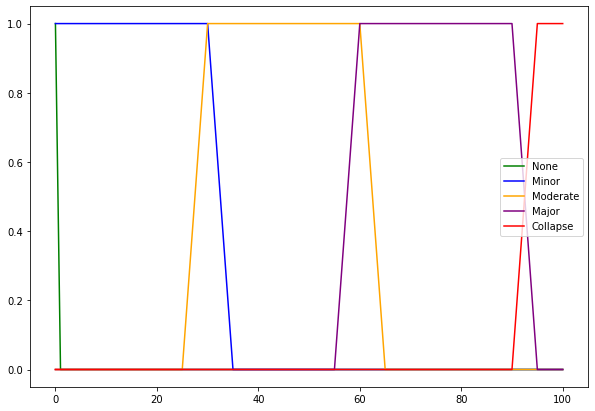

In [48]:
building = Domain("damages", 0, 100, res=0.1)

building.none = S(0,1)
building.minor = S(30,35)
building.moderate = trapezoid(25,30,60,65)
building.major = trapezoid(55,60,90,95)
building.collapse = R(90,95)

plt.plot(building.range, building.none.array(),c = "green")
plt.plot(building.range, building.minor.array(),c = "blue")
plt.plot(building.range, building.moderate.array(),c = "orange")
plt.plot(building.range, building.major.array(),c = "purple")
plt.plot(building.range, building.collapse.array(),c = "red")

plt.legend(['None','Minor','Moderate','Major','Collapse'],loc="right")
plt.rcParams["figure.figsize"] = (10,7)
plt.show()



We have a term set $T(damage)$, and to check this linguistic variable is orthogonal or not, we can use : $ \sum_{i = 1}^{n} \mu_{t_i} (x) = 1 $, $∀x \in X$.

In [55]:
none_arr = building.none.array()
minor_arr = building.minor.array()
moderate_arr = building.moderate.array()
major_arr = building.major.array()
collapse_arr = building.collapse.array()

is_orth = True
for arr in zip(none_arr, minor_arr, moderate_arr, major_arr, collapse_arr):
    if sum(arr) != 1:
        print("it is not orthogonal")
        print(arr, sum(arr))
        is_orth = False
        break
if is_orth:
    print("it is orthogonal")

it is orthogonal


For Linguistic modifiers, we can use Concentration and dilation to each fuzzy set, shown as following below:

$CON(M(None)) = M(None)^2$ 

$DIL(M(Minor)) = M(Minor)^{0.5}$

$CON(M(Moderate)) = M(Moderate)^2$

$DIL(M(Major)) = M(Major)^{0.5}$

$CON(M(Collapse)) = M(Collapse)^2$

In [50]:
none_arr = building.none.array()**2
minor_arr = building.minor.array()**0.5
moderate_arr = building.moderate.array()**2
major_arr = building.major.array()**0.5
collapse_arr = building.collapse.array()**2

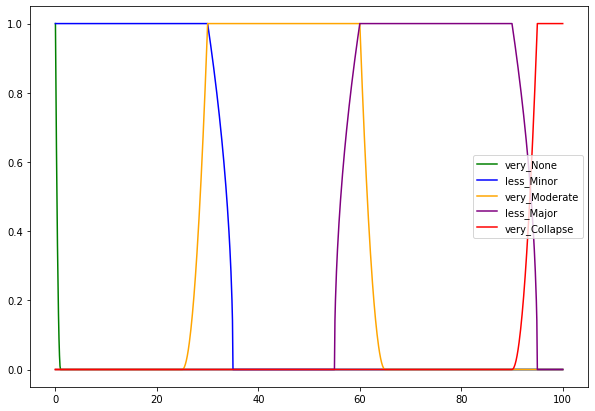

In [51]:
plt.plot(building.range, none_arr, c="green")
plt.plot(building.range, minor_arr, c="blue")
plt.plot(building.range, moderate_arr, c="orange")
plt.plot(building.range, major_arr, c="purple")
plt.plot(building.range, collapse_arr, c="red")

plt.legend(['very None', 'less Minor', 'very Moderate',
           'less Major', 'very Collapse'], loc="right")
plt.rcParams["figure.figsize"] = (10, 7)
plt.show()


In [52]:
is_it = True
for arr in zip(none_arr,minor_arr,moderate_arr,major_arr,collapse_arr):
    if sum(arr) != 1:
        print("it is not orthogonal")
        print(arr, sum(arr))
        is_it = False
        break
if is_it:
    print("it is orthogonal")

it is not orthogonal
(1.0, 1.0, 0.0, 0.0, 0.0) 2.0


3. Provide an example (not present in the study material or textbooks) of generalized modus ponens (as a guideline, see Example page 41 Lecture 5) (5 points).

According to Generalized modus ponens, we can have :

- **Premise:** Tonight the moon is very bright.
- **Implication:** When the moon is bright, then it is romantic.
- **Conclusion:** Tonight the moon is very romantic.

Hence, we can define a membership function when moon is going bright, the universe $X = [0, 100]$. Consider the magnitude of moon, we transfer into percentage, we can have membership function:

$$\mu_{brightness}(x) = 
\begin{cases}
0,& 45 < x\\
(x-45) \times 0.03,& 45 \le x < 75 \\
1,& x \ge 75 
\end{cases}
$$

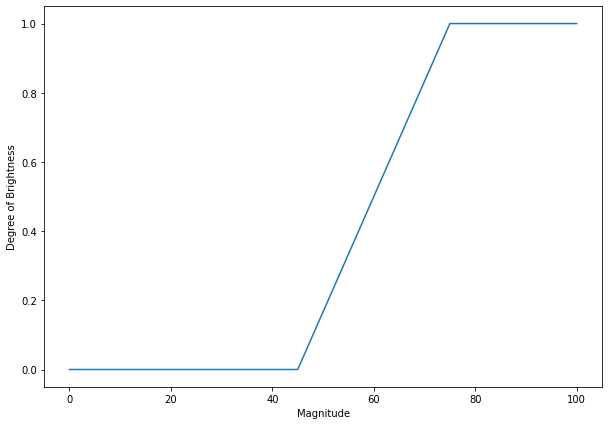

In [53]:
driver = Domain("brightness", 0, 100, res=0.1)
driver.slownes = R(45,75)
driver.slownes.plot()
plt.xlabel("Magnitude")
plt.ylabel("Degree of Brightness")
plt.show()

And we have fuzzy set `degree of romantic`, and it's membership function shown as :

$$\mu_{Romantic}(x) = 
\begin{cases}
0,& 80 < x \\
(x-80) \times 0.066,& 80 \le x < 95 \\
1,& x \ge 95
\end{cases}
$$

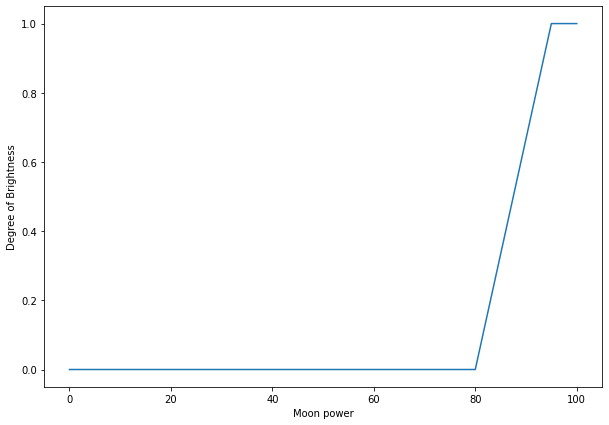

In [54]:
person = Domain("romantic", 0, 100, res=0.1)
person.drunk = R(80,95)
person.drunk.plot()
plt.xlabel("Moon power")
plt.ylabel("Degree of Brightness")
plt.show()

Finally, we can use minimum t-norm to get the membership function of the implication by :
$\mu_{B^∗} (y) = sup_x min[\mu_{A^∗}(x), \mu_R(x, y)]$, $\mu_R(x, y)$ is the membership function of the implication.